In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Mecab
from gensim.models.word2vec import Word2Vec
import matplotlib.font_manager as fm
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
mecab = Mecab()

In [2]:
font_path = '/home/devcat/anaconda3/envs/devcat/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc('font', family=font_name, size=12)
plt.rcParams["figure.figsize"] = (30, 20)
register_matplotlib_converters()

print(font_name)

NanumGothic


In [3]:
doc1 = pd.read_csv('/home/devcat/data/AA/kaggle_chat.csv', encoding='utf-8')
doc2 = pd.read_csv('/home/devcat/data/AA/python_chat.csv', encoding='utf-8')
doc3 = pd.read_csv('/home/devcat/data/AA/torch_chat.csv', 
encoding='utf-8')
stop_words = pd.read_csv('./stopwords.txt',encoding='utf-8')
data = pd.concat([doc1,doc2,doc3])

In [4]:
def process(df):
    doc = df['Message'].tolist()
    clean_doc = []
    for sen in doc:
        if 'chatroom' in sen:
            continue
        elif 'Photo' in sen:
            continue
        elif 'this' in sen:
            continue
        else:clean_doc.append(sen)

    return clean_doc

def regex(readData):
    text = re.sub('[0123456789.a.b.c.d.e.f.g.h.i.j.k.l.m.n.o.p.q.r.s.t.u.v.w.x.y.z;\-\_=+#/\?:^$.,@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', readData)
 
    return text

In [5]:
stop_words = stop_words['words'].tolist()
clean_doc = process(data)

In [6]:
keyword = [mecab.nouns(sen) for sen in clean_doc]
keyword = [word for word in keyword if word not in stop_words]

In [7]:
keyword = [sen for sen in keyword if len(sen)!=0]

In [8]:
results = []
for idx, sen in enumerate(keyword):
    results.append([])
    for word in sen:
        if len(word)>=2:results[idx].append(word)
results = [sen for sen in results if len(sen)!=0]

In [9]:
%%time
model = Word2Vec(results)

CPU times: user 288 ms, sys: 4.31 ms, total: 292 ms
Wall time: 228 ms


In [10]:
model.save('Keyword_vector')

In [11]:
vectors = model.wv.vocab
vector_dict = {}
for keyword in vectors:
    vector_dict[keyword] = model.wv.syn0[vectors[keyword].index]

<ipython-input-11-1dc97a195171>:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  vector_dict[keyword] = model.wv.syn0[vectors[keyword].index]


In [20]:
len(vector_dict)

1032

In [23]:
x = list(vector_dict.values())
np.shape(x[0])

(100,)

In [59]:
from sklearn.manifold import TSNE
import gensim.models as g

model = g.Doc2Vec.load('./Keyword_vector')
vocab = list(model.wv.vocab)
X = model[vocab]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X[:400,:])

<ipython-input-59-f99ac6cfccda>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[vocab]


/home/devcat/anaconda3/envs/devcat/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/devcat/anaconda3/envs/devcat/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


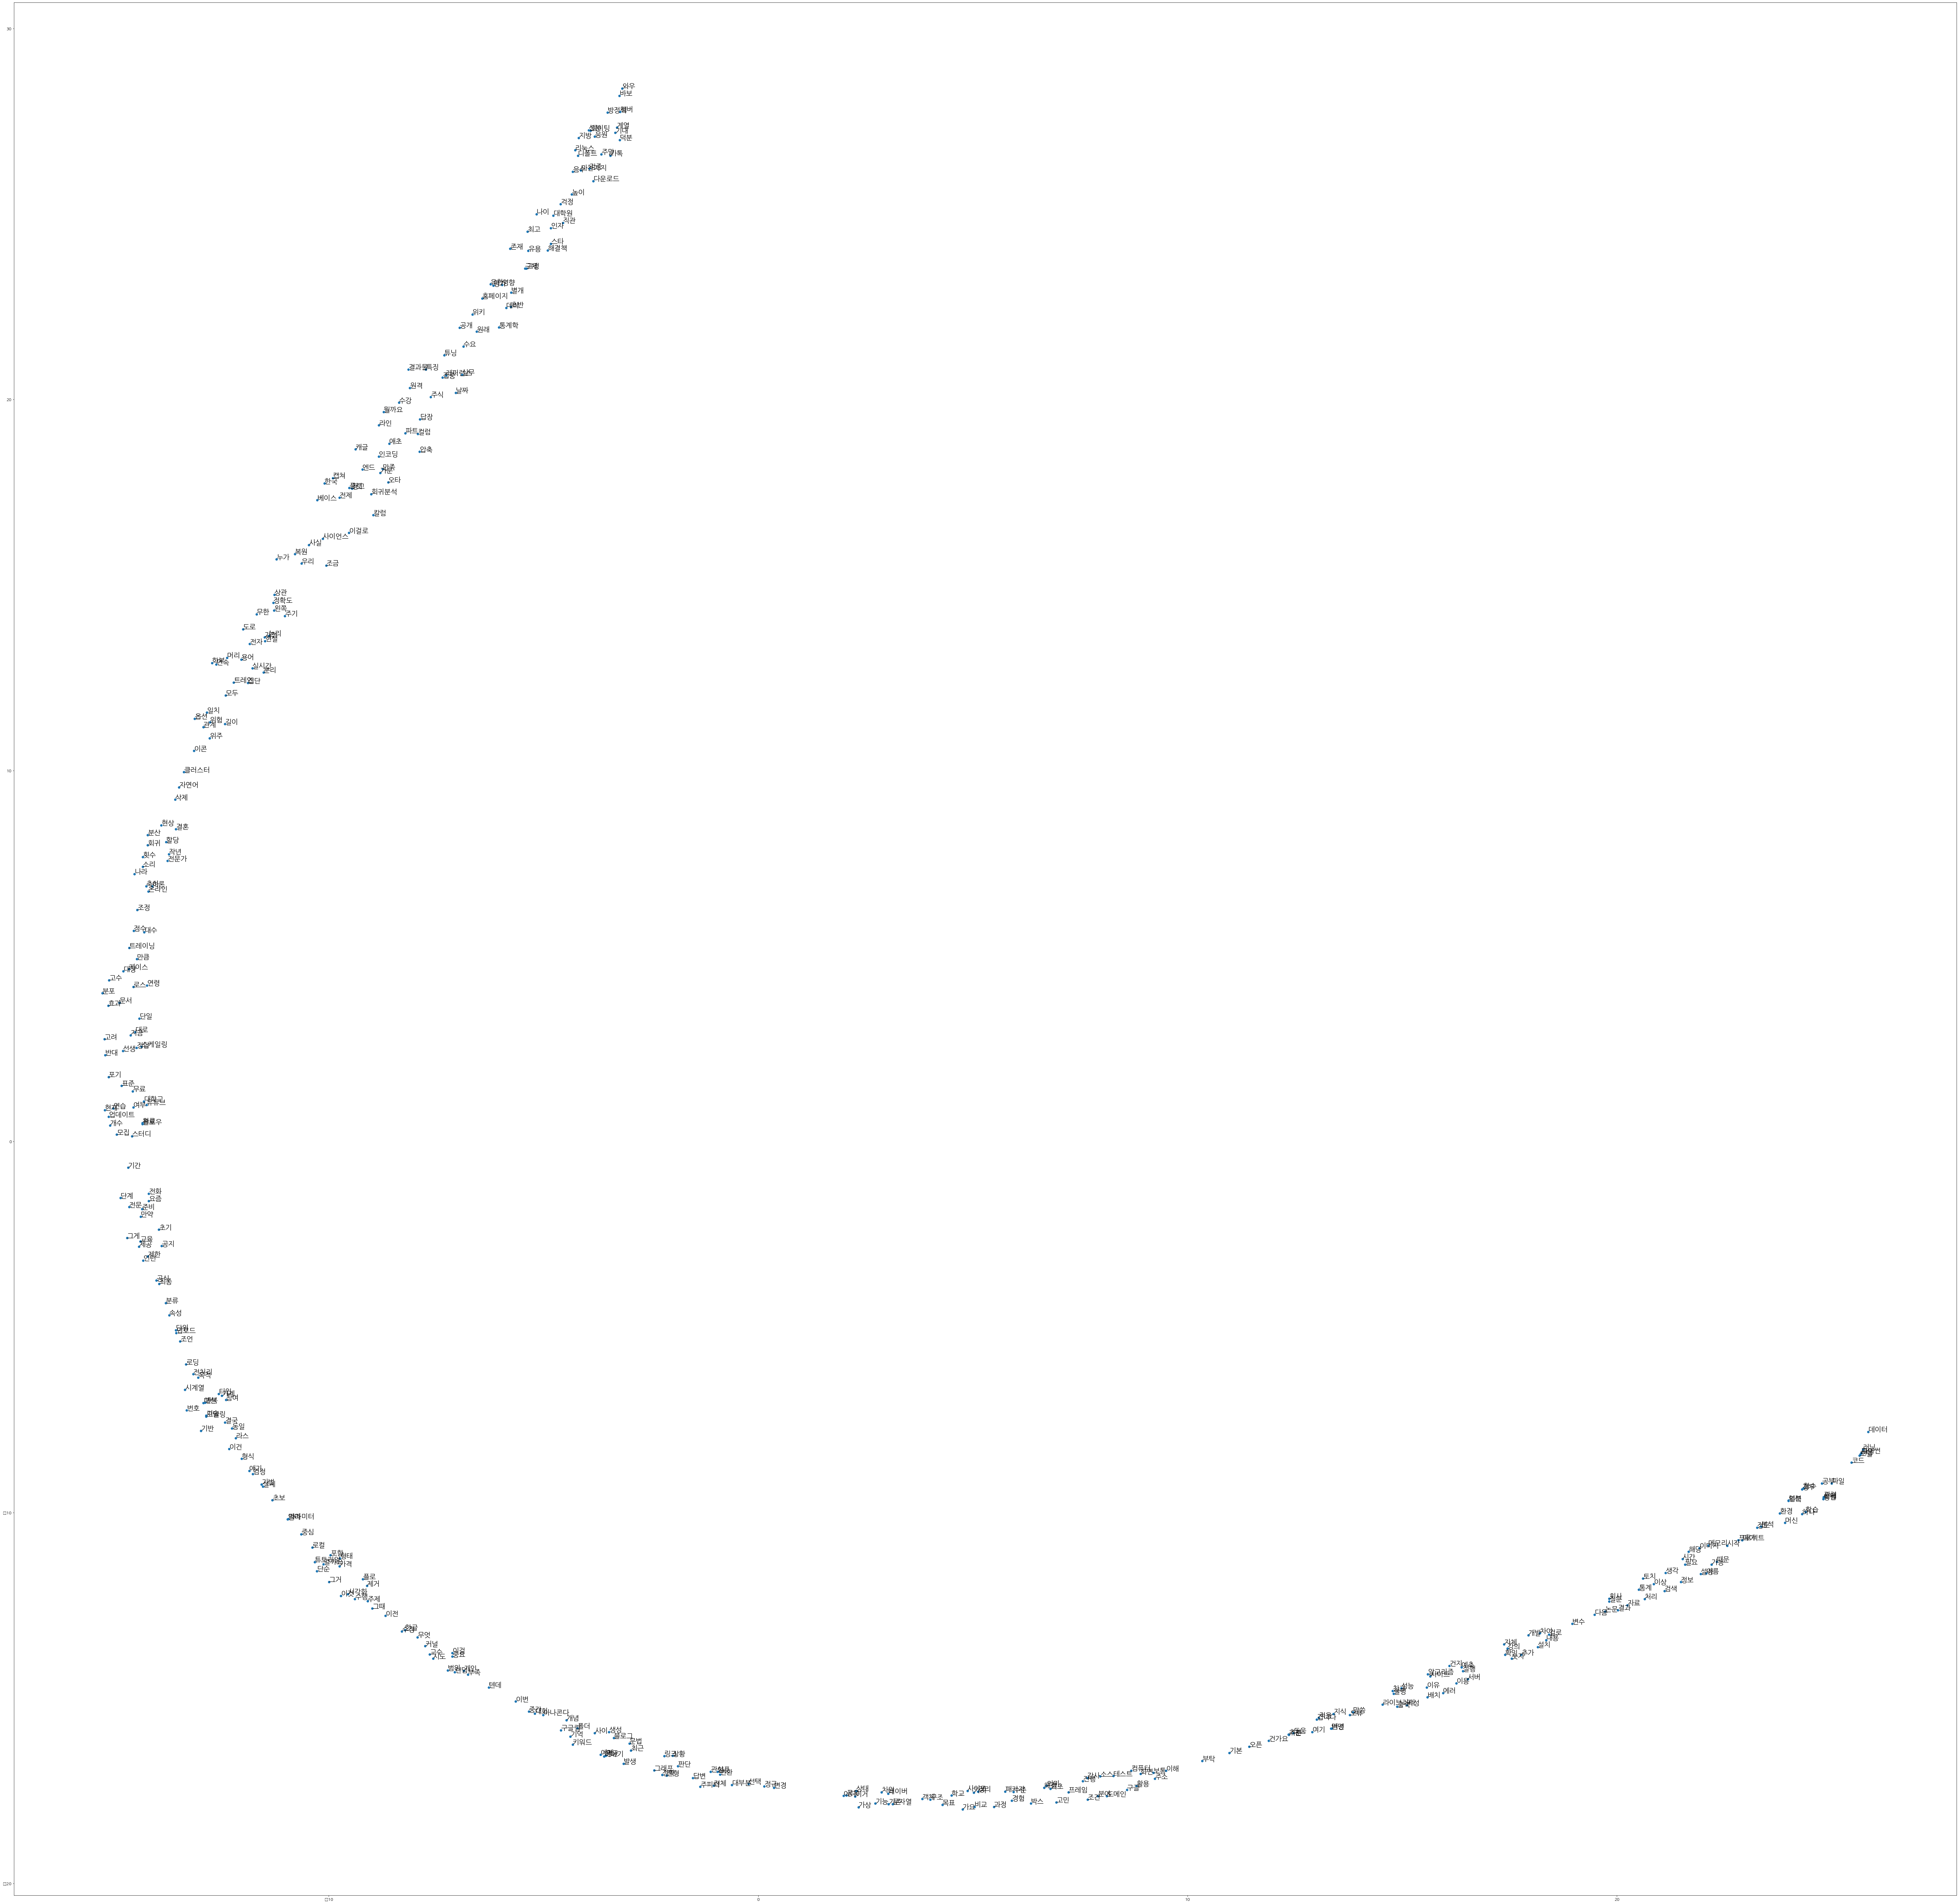

In [60]:
df = pd.DataFrame(X_tsne, index=vocab[:400], columns=['x', 'y'])
fig = plt.figure()
fig.set_size_inches(100, 100)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=20)
plt.show()